In [2]:
!pip install torchvision

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
import torchvision
from torchvision import transforms, datasets

In [4]:
data_path = 'ASL/asl_alphabet_train/asl_alphabet_train'

transform1 = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
dataset = datasets.ImageFolder(data_path, transform=transform1)
num_samples = len(dataset)
dataset

Dataset ImageFolder
    Number of datapoints: 87000
    Root location: ASL/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
indices = torch.randperm(num_samples)

split = int(num_samples * 0.2)

train_dataset = torch.utils.data.Subset(dataset, indices[split:])
test_dataset = torch.utils.data.Subset(dataset, indices[:split])

len(train_dataset), len(test_dataset)

(69600, 17400)

In [7]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
    batch_size=32, 
    shuffle=True, 
    num_workers=4)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4)

In [8]:
classes = dataset.classes
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [9]:
train_dataset[0][0].numpy()

array([[[0.        , 0.        , 0.00392157, ..., 0.01960784,
         0.        , 0.        ],
        [0.        , 0.01176471, 0.07450981, ..., 0.05882353,
         0.03137255, 0.        ],
        [0.        , 0.07843138, 0.25490198, ..., 0.80784315,
         0.7372549 , 0.02745098],
        ...,
        [0.00784314, 0.02352941, 0.54901963, ..., 0.59607846,
         0.57254905, 0.02745098],
        [0.        , 0.01960784, 0.53333336, ..., 0.54509807,
         0.49411765, 0.01176471],
        [0.        , 0.        , 0.01176471, ..., 0.03529412,
         0.00392157, 0.        ]],

       [[0.05098039, 0.02352941, 0.        , ..., 0.        ,
         0.00784314, 0.02352941],
        [0.02745098, 0.00784314, 0.01960784, ..., 0.00392157,
         0.01960784, 0.03137255],
        [0.        , 0.01176471, 0.16078432, ..., 0.7372549 ,
         0.69411767, 0.02352941],
        ...,
        [0.        , 0.01960784, 0.56078434, ..., 0.5686275 ,
         0.5647059 , 0.02352941],
        [0.0

In [10]:
train_dataset[0][0].numpy().shape

(3, 200, 200)

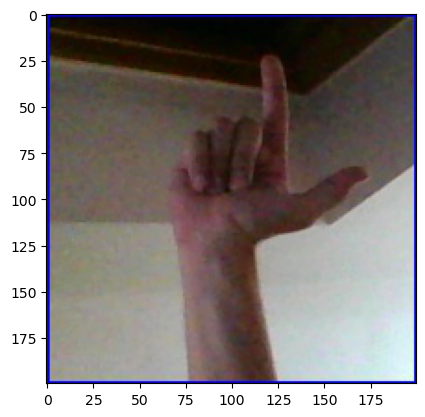

This is  L


In [22]:
n=int(np.random.rand()*10000)

plt.imshow(test_dataset[n][0].permute(1, 2, 0))
label=test_dataset[n][1]
plt.show()
print('This is ', classes[label])